필요한 모듈과 라이브러리들을 가져 옴

In [1]:
#import the libraries For data analysis 
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

matplotlib에서 한글이 깨지는 상황을 막기위해 코드 삽입

In [3]:
%matplotlib inline

import platform
path="c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system')

이미 가지고 있는 교통사고, 인구, 범죄, 세금 데이터들을 가공해 만든 임의의 통합데이터를 사용함

In [4]:
#Load the convert data
data_2015 = pd.read_csv('./data/통합/여기있는거쓰렴/2015통합_.csv', engine='python')
data_2016=  pd.read_csv('./data/통합/여기있는거쓰렴/2016통합.csv', engine='python')


In [5]:
data_2016.head()

,crimeRate,city_idx,total,out_per,total_m,total_w,out_m,out_w,suicide_rate,tax,death,injured,cctv,city_id,city_name,district_name,age,65세인구,유흥주점
0,0.007270,1,9805506,0.0342,4799115,5006391,162741,172426,19.8,9551358036,348,477,44457,1,서울특별시,서울,65세이상,1247946,2000
1,0.007449,2,2913024,0.0247,1465699,1447325,41959,29914,23.2,1853394506,144,225,8680,2,인천광역시,인천,65세이상,319828,989
2,0.010582,3,623332,0.0280,314133,309199,10194,7282,21.0,651379778,80,93,2249,3,제주특별자치도,제주,65세이상,86724,765
3,0.003629,4,242507,0.0199,122648,119859,2883,1952,23.2,294869511,25,33,1848,4,세종특별자치시,세종,65세이상,22992,33
4,0.006452,5,1535445,0.0128,770971,764474,9222,10465,22.6,577589143,99,171,6356,5,대전광역시,대전,65세이상,171173,300


두개의 데이터를 합쳐 하나의 total data로 한 후 작업을 실시

그러기 위해서는 데이터 구분을 위한 column 추가

In [6]:
data_2015['year'] = 2015
data_2016['year'] = 2016
data_2015['per_tax'] = data_2015['tax'] / data_2015['total']
data_2016['per_tax'] = data_2016['tax'] / data_2016['total']
data_2015['per_old'] = data_2015['65세인구'] / data_2015['total']
data_2016['per_old'] = data_2016['65세인구'] / data_2016['total']
data_2015.head()


,crimeRate,city_idx,total,out_per,total_m,total_w,out_m,out_w,suicide_rate,tax,...,cctv,city_id,city_name,district_name,age,65세인구,유흥주점,year,per_tax,per_old
0,0.007215,1,9904312,0.0340,4859535,5044777,165218,171898,19.9,9169412842,...,44457,1,서울특별시,서울,65세이상,1221006,1959,2015,925.800080,0.123280
1,0.006780,2,2890451,0.0235,1455017,1435434,40224,27626,24.1,1764120424,...,8680,2,인천광역시,인천,65세이상,308040,938,2015,610.327047,0.106572
2,0.009765,3,605619,0.0250,304789,300830,8914,6232,22.3,509905893,...,2249,3,제주특별자치도,제주,65세이상,83468,743,2015,841.958216,0.137823
3,0.002440,4,204088,0.0219,103210,100878,2755,1716,19.7,328603432,...,1848,4,세종특별자치시,세종,65세이상,21103,33,2015,1610.106581,0.103401
4,0.006199,5,1538394,0.0124,772243,766151,8933,10147,24.5,585202673,...,6356,5,대전광역시,대전,65세이상,164305,294,2015,380.398437,0.106803


구분하기 편하게 district_name과 city_name을 합쳐 하나의 city 속성으로 하고

그 속성을 index로 변환

In [7]:
data_2015['city'] = data_2015['city_name'] +' ' +data_2015['district_name']
data_2015.set_index('city', inplace=True)
data_2016['city'] = data_2016['city_name'] +' ' +data_2016['district_name']
data_2016.set_index('city', inplace=True)

여기서 필요한 정보를 제외하고는 삭제를 진행

전체 남성, 전체 여성 ,내국인 남성, 외국인 여성, 외국인 남성 속성을 삭제

In [8]:
#delete the non_valueable
del data_2015['total_m']
del data_2015['total_w']
del data_2015['out_m']
del data_2015['out_w']
del data_2015['city_idx']
del data_2016['total_m']
del data_2016['total_w']
del data_2016['out_m']
del data_2016['out_w']
del data_2016['city_idx']


In [9]:
total_data = pd.concat([data_2015, data_2016])

In [10]:
total_data.head()

,crimeRate,total,out_per,suicide_rate,tax,death,injured,cctv,city_id,city_name,district_name,age,65세인구,유흥주점,year,per_tax,per_old
city,,,,,,,,,,,,,,,,,
서울특별시 서울,0.007215,9904312,0.0340,19.9,9169412842,376,591,44457,1,서울특별시,서울,65세이상,1221006,1959,2015,925.800080,0.123280
인천광역시 인천,0.006780,2890451,0.0235,24.1,1764120424,136,255,8680,2,인천광역시,인천,65세이상,308040,938,2015,610.327047,0.106572
제주특별자치도 제주,0.009765,605619,0.0250,22.3,509905893,93,145,2249,3,제주특별자치도,제주,65세이상,83468,743,2015,841.958216,0.137823
세종특별자치시 세종,0.002440,204088,0.0219,19.7,328603432,19,24,1848,4,세종특별자치시,세종,65세이상,21103,33,2015,1610.106581,0.103401
대전광역시 대전,0.006199,1538394,0.0124,24.5,585202673,97,143,6356,5,대전광역시,대전,65세이상,164305,294,2015,380.398437,0.106803


### Correlation Analysis

상관분석은 numpy 모듈의 corrcoef를 사용함

상관분석에서

절댓값 0.1 이하는 무시하고

절댓값 0.3 이하는 약한 상관관계를

절댓값 0.7 이하는 강한 상관관계를 나타낸다

세금을 1인당 세금 비율로 계산

##### 우선은 범죄율과 다른 데이터들의상관관계를 분석

In [11]:
print('2015년 상관관계')
print('범죄율 / 인구수: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['total']))
print('범죄율 / 외국인 비율: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['out_per']))
print('범죄율 / 자살율: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['suicide_rate']))
print('범죄율 / 소득수준: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['per_tax']))
print('범죄율 / 교통사고사망자: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['death']))
print('범죄율 / 교통사고부상자: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['injured']))
print('범죄율 / cctv: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['cctv']))


2015년 상관관계
범죄율 / 인구수: 
[[1.         0.11201928]
 [0.11201928 1.        ]]
범죄율 / 외국인 비율: 
[[1.         0.12703708]
 [0.12703708 1.        ]]
범죄율 / 자살율: 
[[1.         0.23153361]
 [0.23153361 1.        ]]
범죄율 / 소득수준: 
[[ 1.         -0.27059607]
 [-0.27059607  1.        ]]
범죄율 / 교통사고사망자: 
[[1.         0.10984901]
 [0.10984901 1.        ]]
범죄율 / 교통사고부상자: 
[[1.         0.10245589]
 [0.10245589 1.        ]]
범죄율 / cctv: 
[[1.         0.12685605]
 [0.12685605 1.        ]]


그 다음은 인구수와 상관관계를 보려고 한다

In [12]:
print('인구수 / 외국인비율: ')
print(np.corrcoef(data_2015['total'], data_2015['out_per']))
print('인구수 / 자살율: ')
print(np.corrcoef(data_2015['total'], data_2015['suicide_rate']))
print('인구수 / 소득수준: ')
print(np.corrcoef(data_2015['total'], data_2015['per_tax']))
print('인구수 / 교통사고사망자: ')
print(np.corrcoef(data_2015['total'], data_2015['death']))
print('인구수 / 교통사고부상자: ')
print(np.corrcoef(data_2015['total'], data_2015['injured']))


인구수 / 외국인비율: 
[[1.         0.00241154]
 [0.00241154 1.        ]]
인구수 / 자살율: 
[[ 1.         -0.13318281]
 [-0.13318281  1.        ]]
인구수 / 소득수준: 
[[1.         0.09678743]
 [0.09678743 1.        ]]
인구수 / 교통사고사망자: 
[[1.         0.94929584]
 [0.94929584 1.        ]]
인구수 / 교통사고부상자: 
[[1.         0.94800863]
 [0.94800863 1.        ]]


In [13]:
print('외국인비율 / 자살율: ')
print(np.corrcoef(data_2015['out_per'], data_2015['suicide_rate']))
print('외국인비율 / 소득수준: ')
print(np.corrcoef(data_2015['out_per'], data_2015['per_tax']))
print('외국인비율 / 교통사고사망자: ')
print(np.corrcoef(data_2015['out_per'], data_2015['death']))
print('외국인비율 / 교통사고부상자: ')
print(np.corrcoef(data_2015['out_per'], data_2015['injured']))
print('외국인비율 / cctv: ')
print(np.corrcoef(data_2015['out_per'], data_2015['cctv']))

외국인비율 / 자살율: 
[[1.         0.29657617]
 [0.29657617 1.        ]]
외국인비율 / 소득수준: 
[[1.         0.32721104]
 [0.32721104 1.        ]]
외국인비율 / 교통사고사망자: 
[[1.         0.01268914]
 [0.01268914 1.        ]]
외국인비율 / 교통사고부상자: 
[[1.        0.0391877]
 [0.0391877 1.       ]]
외국인비율 / cctv: 
[[1.         0.00826035]
 [0.00826035 1.        ]]


In [14]:
print('자살율 / 소득수준: ')
print(np.corrcoef(data_2015['suicide_rate'], data_2015['per_tax']))
print('자살율 / 교통사고사망자: ')
print(np.corrcoef(data_2015['suicide_rate'], data_2015['death']))
print('자살율 / 교통사고부상자: ')
print(np.corrcoef(data_2015['suicide_rate'], data_2015['injured']))
print('자살율 / cctv: ')
print(np.corrcoef(data_2015['suicide_rate'], data_2015['cctv']))

자살율 / 소득수준: 
[[ 1.         -0.15435265]
 [-0.15435265  1.        ]]
자살율 / 교통사고사망자: 
[[ 1.         -0.09441106]
 [-0.09441106  1.        ]]
자살율 / 교통사고부상자: 
[[ 1.         -0.08056856]
 [-0.08056856  1.        ]]
자살율 / cctv: 
[[ 1.         -0.14337776]
 [-0.14337776  1.        ]]


In [15]:
print('소득수준 / 교통사고사망자: ')
print(np.corrcoef(data_2015['per_tax'], data_2015['death']))
print('소득수준 / 교통사고부상자: ')
print(np.corrcoef(data_2015['per_tax'], data_2015['injured']))
print('소득수준 / cctv: ')
print(np.corrcoef(data_2015['per_tax'], data_2015['cctv']))

소득수준 / 교통사고사망자: 
[[1.         0.12363628]
 [0.12363628 1.        ]]
소득수준 / 교통사고부상자: 
[[1.         0.14426932]
 [0.14426932 1.        ]]
소득수준 / cctv: 
[[1.         0.11267191]
 [0.11267191 1.        ]]


In [16]:
print('교통사고사망자 / 교통사고부상자: ')
print(np.corrcoef(data_2015['death'], data_2015['injured']))
print('교통사고사망자 / cctv: ')
print(np.corrcoef(data_2015['death'], data_2015['cctv']))

교통사고사망자 / 교통사고부상자: 
[[1.         0.98804444]
 [0.98804444 1.        ]]
교통사고사망자 / cctv: 
[[1.         0.90752392]
 [0.90752392 1.        ]]


In [17]:
print('교통사고부상자 / cctv: ')
print(np.corrcoef(data_2015['injured'], data_2015['cctv']))

교통사고부상자 / cctv: 
[[1.         0.89430344]
 [0.89430344 1.        ]]


##### 2016년도

In [18]:
print('2016년 상관관계')
print('범죄율 / 인구수: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['total']))
print('범죄율 / 외국인 비율: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['out_per']))
print('범죄율 / 자살율: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['suicide_rate']))
print('범죄율 / 소득수준: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['per_tax']))
print('범죄율 / 교통사고사망자: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['death']))
print('범죄율 / 교통사고부상자: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['injured']))
print('범죄율 / cctv: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['cctv']))


2016년 상관관계
범죄율 / 인구수: 
[[1.         0.08015944]
 [0.08015944 1.        ]]
범죄율 / 외국인 비율: 
[[1.         0.02958245]
 [0.02958245 1.        ]]
범죄율 / 자살율: 
[[1.         0.07748134]
 [0.07748134 1.        ]]
범죄율 / 소득수준: 
[[ 1.         -0.22498268]
 [-0.22498268  1.        ]]
범죄율 / 교통사고사망자: 
[[1.         0.06664036]
 [0.06664036 1.        ]]
범죄율 / 교통사고부상자: 
[[1.         0.05000537]
 [0.05000537 1.        ]]
범죄율 / cctv: 
[[1.         0.08810639]
 [0.08810639 1.        ]]


In [19]:
print('인구수 / 외국인비율: ')
print(np.corrcoef(data_2016['total'], data_2016['out_per']))
print('인구수 / 자살율: ')
print(np.corrcoef(data_2016['total'], data_2016['suicide_rate']))
print('인구수 / 소득수준: ')
print(np.corrcoef(data_2016['total'], data_2016['per_tax']))
print('인구수 / 교통사고사망자: ')
print(np.corrcoef(data_2016['total'], data_2016['death']))
print('인구수 / 교통사고부상자: ')
print(np.corrcoef(data_2016['total'], data_2016['injured']))


인구수 / 외국인비율: 
[[ 1.         -0.00892639]
 [-0.00892639  1.        ]]
인구수 / 자살율: 
[[ 1.         -0.17275661]
 [-0.17275661  1.        ]]
인구수 / 소득수준: 
[[1.         0.05499543]
 [0.05499543 1.        ]]
인구수 / 교통사고사망자: 
[[1.         0.95102988]
 [0.95102988 1.        ]]
인구수 / 교통사고부상자: 
[[1.         0.93108052]
 [0.93108052 1.        ]]


In [20]:
print('외국인비율 / 자살율: ')
print(np.corrcoef(data_2016['out_per'], data_2016['suicide_rate']))
print('외국인비율 / 소득수준: ')
print(np.corrcoef(data_2016['out_per'], data_2016['per_tax']))
print('외국인비율 / 교통사고사망자: ')
print(np.corrcoef(data_2016['out_per'], data_2016['death']))
print('외국인비율 / 교통사고부상자: ')
print(np.corrcoef(data_2016['out_per'], data_2016['injured']))
print('외국인비율 / cctv: ')
print(np.corrcoef(data_2016['out_per'], data_2016['cctv']))

외국인비율 / 자살율: 
[[1.         0.06484366]
 [0.06484366 1.        ]]
외국인비율 / 소득수준: 
[[1.         0.26407606]
 [0.26407606 1.        ]]
외국인비율 / 교통사고사망자: 
[[ 1.         -0.00196647]
 [-0.00196647  1.        ]]
외국인비율 / 교통사고부상자: 
[[ 1.         -0.01543173]
 [-0.01543173  1.        ]]
외국인비율 / cctv: 
[[ 1.         -0.00953766]
 [-0.00953766  1.        ]]


In [21]:
print('자살율 / 소득수준: ')
print(np.corrcoef(data_2016['suicide_rate'], data_2016['per_tax']))
print('자살율 / 교통사고사망자: ')
print(np.corrcoef(data_2016['suicide_rate'], data_2016['death']))
print('자살율 / 교통사고부상자: ')
print(np.corrcoef(data_2016['suicide_rate'], data_2016['injured']))
print('자살율 / cctv: ')
print(np.corrcoef(data_2016['suicide_rate'], data_2016['cctv']))

자살율 / 소득수준: 
[[ 1.         -0.23232916]
 [-0.23232916  1.        ]]
자살율 / 교통사고사망자: 
[[ 1.         -0.13038329]
 [-0.13038329  1.        ]]
자살율 / 교통사고부상자: 
[[ 1.         -0.13889226]
 [-0.13889226  1.        ]]
자살율 / cctv: 
[[ 1.         -0.17923244]
 [-0.17923244  1.        ]]


In [22]:
print('소득수준 / 교통사고사망자: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['death']))
print('소득수준 / 교통사고부상자: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['injured']))
print('소득수준 / cctv: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['cctv']))

소득수준 / 교통사고사망자: 
[[1.         0.02771792]
 [0.02771792 1.        ]]
소득수준 / 교통사고부상자: 
[[1.         0.01892091]
 [0.01892091 1.        ]]
소득수준 / cctv: 
[[1.         0.06873569]
 [0.06873569 1.        ]]


In [23]:
print('교통사고사망자 / 교통사고부상자: ')
print(np.corrcoef(data_2016['death'], data_2016['injured']))
print('교통사고사망자 / cctv: ')
print(np.corrcoef(data_2016['death'], data_2016['cctv']))

교통사고사망자 / 교통사고부상자: 
[[1.         0.98901119]
 [0.98901119 1.        ]]
교통사고사망자 / cctv: 
[[1.        0.9060826]
 [0.9060826 1.       ]]


In [24]:
print('교통사고부상자 / cctv: ')
print(np.corrcoef(data_2016['injured'], data_2016['cctv']))

교통사고부상자 / cctv: 
[[1.         0.87478635]
 [0.87478635 1.        ]]


In [25]:
print('전체 상관관계')
print('범죄율 / 인구수: ')
print(np.corrcoef(total_data['crimeRate'], total_data['total']))
print('범죄율 / 외국인 비율: ')
print(np.corrcoef(total_data['crimeRate'], total_data['out_per']))
print('범죄율 / 자살율: ')
print(np.corrcoef(total_data['crimeRate'], total_data['suicide_rate']))
print('범죄율 / 소득수준: ')
print(np.corrcoef(total_data['crimeRate'], total_data['per_tax']))
print('범죄율 / 교통사고사망자: ')
print(np.corrcoef(total_data['crimeRate'], total_data['death']))
print('범죄율 / 교통사고부상자: ')
print(np.corrcoef(total_data['crimeRate'], total_data['injured']))
print('범죄율 / cctv: ')
print(np.corrcoef(total_data['crimeRate'], total_data['cctv']))
print('범죄율 / 고령자: ')
print(np.corrcoef(total_data['crimeRate'], total_data['per_old']))
print('범죄율 / 유흥주점: ')
print(np.corrcoef(total_data['crimeRate'], total_data['유흥주점']))

전체 상관관계
범죄율 / 인구수: 
[[1.         0.09660331]
 [0.09660331 1.        ]]
범죄율 / 외국인 비율: 
[[1.       0.080479]
 [0.080479 1.      ]]
범죄율 / 자살율: 
[[1.         0.15653628]
 [0.15653628 1.        ]]
범죄율 / 소득수준: 
[[ 1.         -0.24228313]
 [-0.24228313  1.        ]]
범죄율 / 교통사고사망자: 
[[1.         0.08763265]
 [0.08763265 1.        ]]
범죄율 / 교통사고부상자: 
[[1.         0.07557786]
 [0.07557786 1.        ]]
범죄율 / cctv: 
[[1.         0.10797348]
 [0.10797348 1.        ]]
범죄율 / 고령자: 
[[ 1.        -0.1787558]
 [-0.1787558  1.       ]]
범죄율 / 유흥주점: 
[[1.         0.18758886]
 [0.18758886 1.        ]]


In [26]:
print('인구수 / 외국인비율: ')
print(np.corrcoef(total_data['total'], total_data['out_per']))
print('인구수 / 자살율: ')
print(np.corrcoef(total_data['total'], total_data['suicide_rate']))
print('인구수 / 소득수준: ')
print(np.corrcoef(total_data['total'], total_data['per_tax']))
print('인구수 / 교통사고사망자: ')
print(np.corrcoef(total_data['total'], total_data['death']))
print('인구수 / 교통사고부상자: ')
print(np.corrcoef(total_data['total'], total_data['injured']))
print('인구수 / 고령자: ')
print(np.corrcoef(total_data['injured'], total_data['per_old']))
print('인구수 / 유흥주점: ')
print(np.corrcoef(total_data['injured'], total_data['유흥주점']))

인구수 / 외국인비율: 
[[ 1.         -0.00319547]
 [-0.00319547  1.        ]]
인구수 / 자살율: 
[[ 1.         -0.15156254]
 [-0.15156254  1.        ]]
인구수 / 소득수준: 
[[1.         0.07587214]
 [0.07587214 1.        ]]
인구수 / 교통사고사망자: 
[[1.         0.94928439]
 [0.94928439 1.        ]]
인구수 / 교통사고부상자: 
[[1.         0.93629022]
 [0.93629022 1.        ]]
인구수 / 고령자: 
[[ 1.        -0.1533784]
 [-0.1533784  1.       ]]
인구수 / 유흥주점: 
[[1.         0.76466726]
 [0.76466726 1.        ]]


In [27]:
print('외국인비율 / 자살율: ')
print(np.corrcoef(total_data['out_per'], total_data['suicide_rate']))
print('외국인비율 / 소득수준: ')
print(np.corrcoef(total_data['out_per'], total_data['per_tax']))
print('외국인비율 / 교통사고사망자: ')
print(np.corrcoef(total_data['out_per'], total_data['death']))
print('외국인비율 / 교통사고부상자: ')
print(np.corrcoef(total_data['out_per'], total_data['injured']))
print('외국인비율 / cctv: ')
print(np.corrcoef(total_data['out_per'], total_data['cctv']))
print('외국인비율 / 고령자: ')
print(np.corrcoef(total_data['out_per'], total_data['65세인구']))
print('외국인비율 / 유흥주점: ')
print(np.corrcoef(total_data['out_per'], total_data['유흥주점']))

외국인비율 / 자살율: 
[[1.         0.18247886]
 [0.18247886 1.        ]]
외국인비율 / 소득수준: 
[[1.         0.29632044]
 [0.29632044 1.        ]]
외국인비율 / 교통사고사망자: 
[[1.         0.00457693]
 [0.00457693 1.        ]]
외국인비율 / 교통사고부상자: 
[[1.         0.01188978]
 [0.01188978 1.        ]]
외국인비율 / cctv: 
[[ 1.00000000e+00 -6.58826632e-04]
 [-6.58826632e-04  1.00000000e+00]]
외국인비율 / 고령자: 
[[ 1.         -0.02947077]
 [-0.02947077  1.        ]]
외국인비율 / 유흥주점: 
[[ 1.         -0.06221537]
 [-0.06221537  1.        ]]


In [28]:
print('자살율 / 소득수준: ')
print(np.corrcoef(total_data['suicide_rate'], total_data['per_tax']))
print('자살율 / 교통사고사망자: ')
print(np.corrcoef(total_data['suicide_rate'], total_data['death']))
print('자살율 / 교통사고부상자: ')
print(np.corrcoef(total_data['suicide_rate'], total_data['injured']))
print('자살율 / cctv: ')
print(np.corrcoef(total_data['suicide_rate'], total_data['cctv']))
print('자살율 / 고령자: ')
print(np.corrcoef(total_data['suicide_rate'], total_data['65세인구']))
print('자살율 / 유흥주점: ')
print(np.corrcoef(total_data['suicide_rate'], total_data['유흥주점']))

자살율 / 소득수준: 
[[ 1.         -0.19474782]
 [-0.19474782  1.        ]]
자살율 / 교통사고사망자: 
[[ 1.         -0.10893671]
 [-0.10893671  1.        ]]
자살율 / 교통사고부상자: 
[[ 1.         -0.10254101]
 [-0.10254101  1.        ]]
자살율 / cctv: 
[[ 1.        -0.1599992]
 [-0.1599992  1.       ]]
자살율 / 고령자: 
[[ 1.         -0.13407867]
 [-0.13407867  1.        ]]
자살율 / 유흥주점: 
[[ 1.         -0.11369924]
 [-0.11369924  1.        ]]


In [29]:
print('소득수준 / 교통사고사망자: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['death']))
print('소득수준 / 교통사고부상자: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['injured']))
print('소득수준 / cctv: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['cctv']))
print('소득수준 / 고령자: ')
print(np.corrcoef(total_data['per_tax'], total_data['65세인구']))
print('소득수준 / 유흥주점: ')
print(np.corrcoef(total_data['per_tax'], total_data['유흥주점']))

소득수준 / 교통사고사망자: 
[[1.         0.02771792]
 [0.02771792 1.        ]]
소득수준 / 교통사고부상자: 
[[1.         0.01892091]
 [0.01892091 1.        ]]
소득수준 / cctv: 
[[1.         0.06873569]
 [0.06873569 1.        ]]
소득수준 / 고령자: 
[[1.         0.05747794]
 [0.05747794 1.        ]]
소득수준 / 유흥주점: 
[[1.         0.00448985]
 [0.00448985 1.        ]]


In [30]:
print('교통사고사망자 / 고령자: ')
print(np.corrcoef(total_data['death'], total_data['65세인구']))
print('교통사고사망자 / 유흥주점: ')
print(np.corrcoef(total_data['death'], total_data['유흥주점']))

교통사고사망자 / 고령자: 
[[1.         0.94270112]
 [0.94270112 1.        ]]
교통사고사망자 / 유흥주점: 
[[1.         0.79374947]
 [0.79374947 1.        ]]


In [42]:
print('cctv / 고령자: ')
print(np.corrcoef(total_data['cctv'], total_data['65세인구']))
print('유흥주점 / 고령자: ')
print(np.corrcoef(total_data['유흥주점'], total_data['65세인구']))

cctv / 고령자: 
[[1.         0.93061821]
 [0.93061821 1.        ]]
유흥주점 / 고령자: 
[[1.         0.75053647]
 [0.75053647 1.        ]]


### 분석결과

#### 2015년

범죄율과 소득수준이 음의 약한 상관관계를 가졌고

인구수는 자살율과 음의 약한 상관관계를 ,교통사고 사망자,부상자와는 매우 강한 양의 상관관계를 보이고,

### DATA Visualation

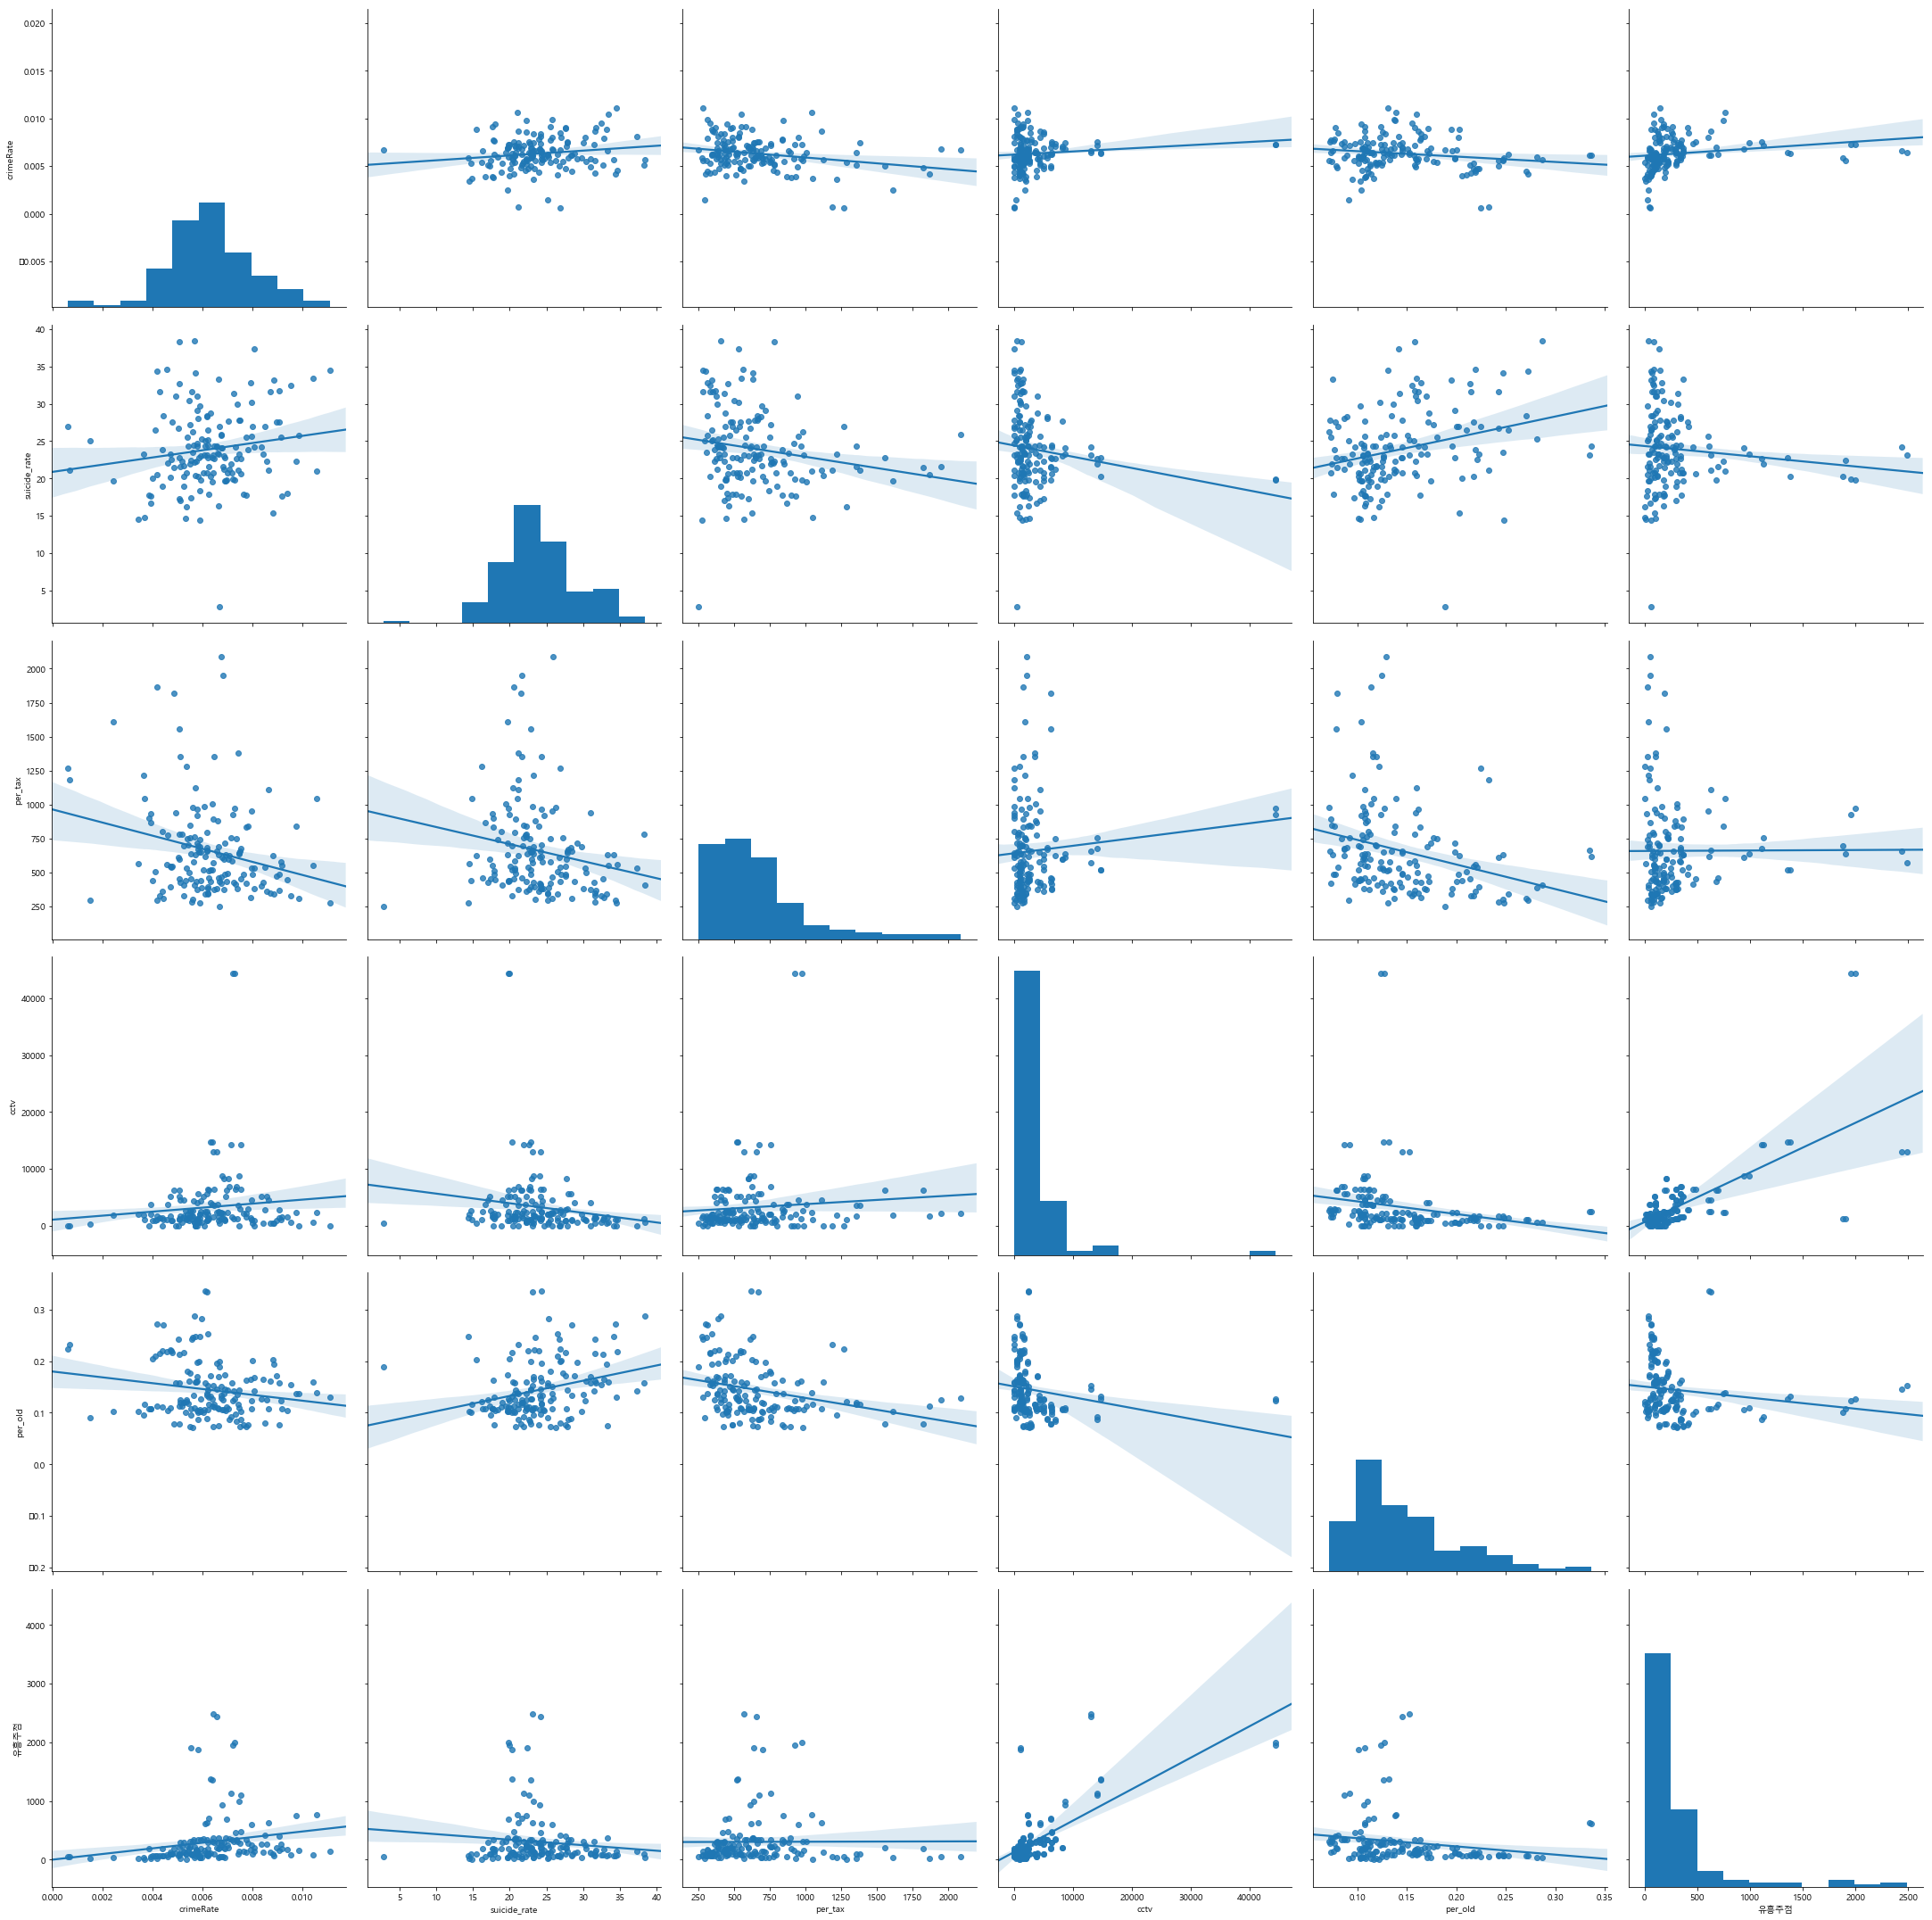

In [48]:
sns.pairplot(total_data, vars=["crimeRate", "suicide_rate", "per_tax","cctv", "per_old", "유흥주점"], kind='reg', size=5)
plt.show()

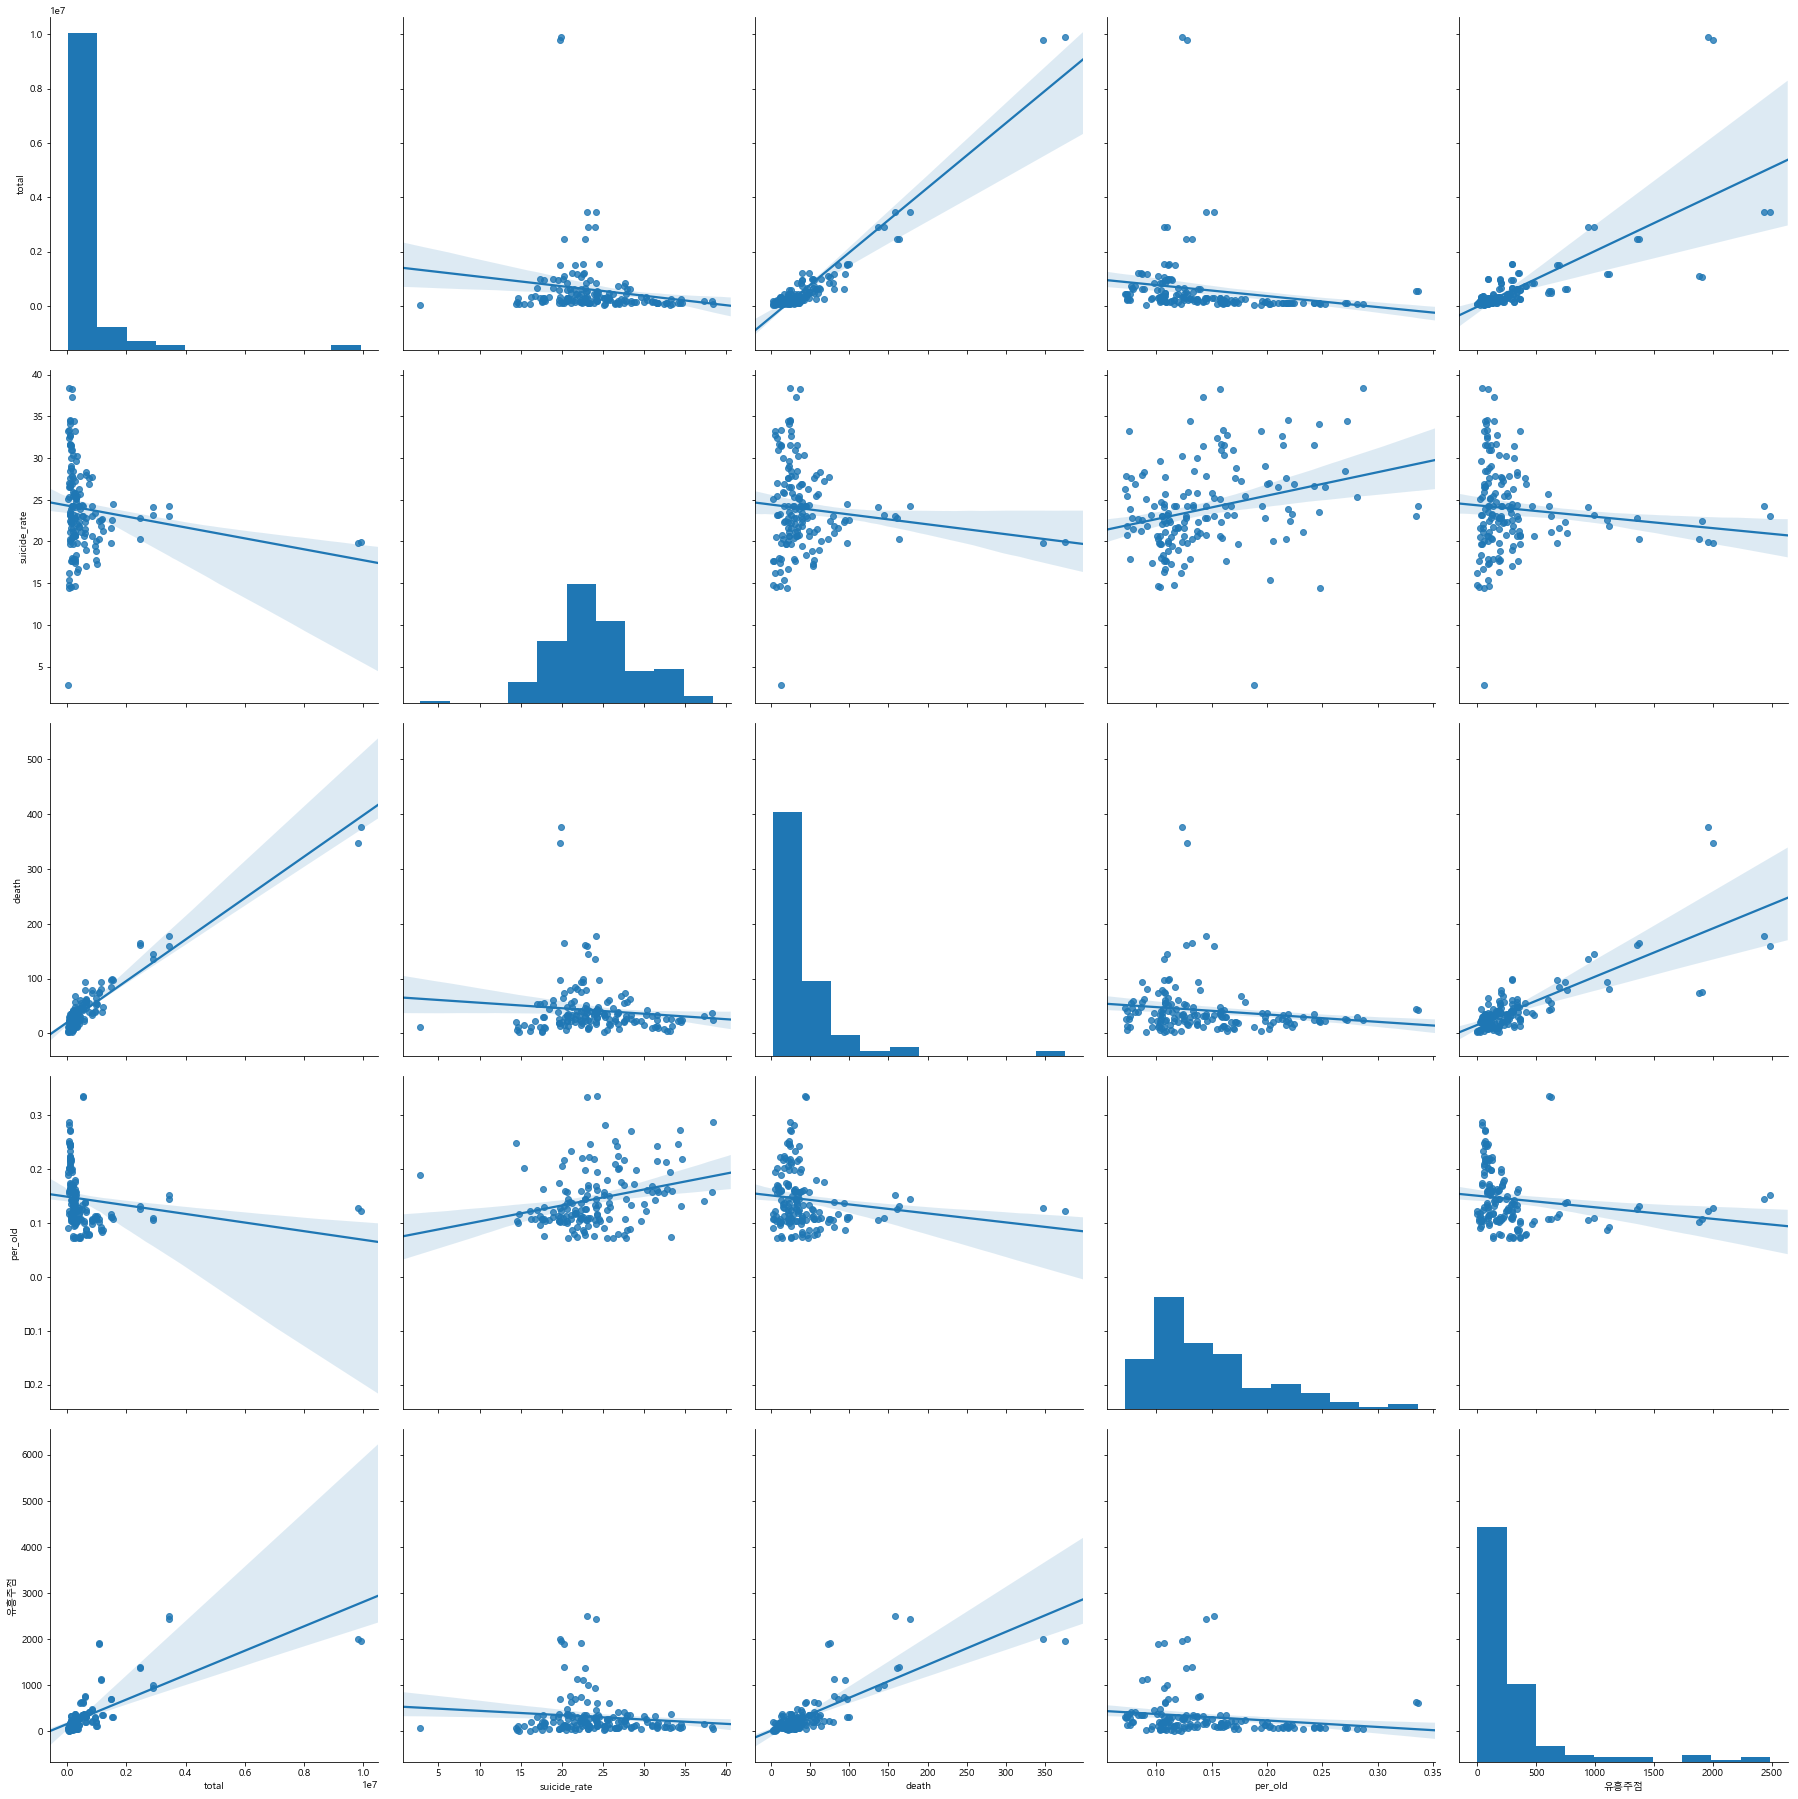

In [44]:
sns.pairplot(total_data, vars=["total",  "suicide_rate", "death","per_old", "유흥주점"], kind='reg', size=5)
plt.show()

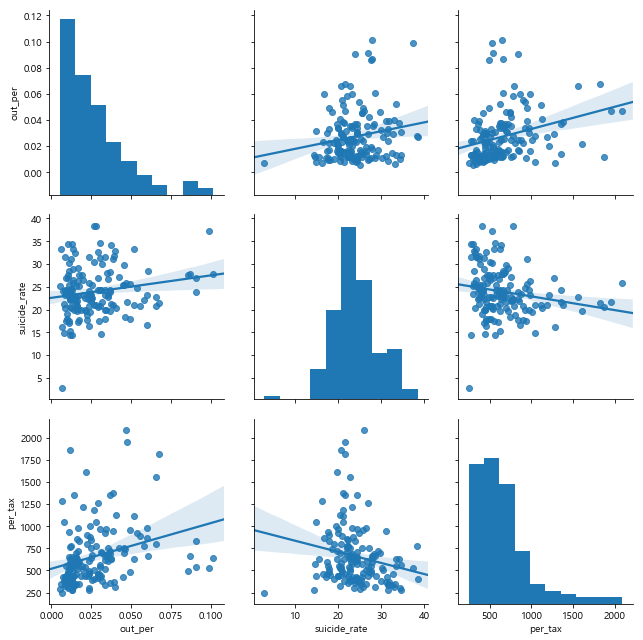

In [34]:
sns.pairplot(total_data, vars=["out_per", "suicide_rate", "per_tax"], kind='reg', size=3)
plt.show()

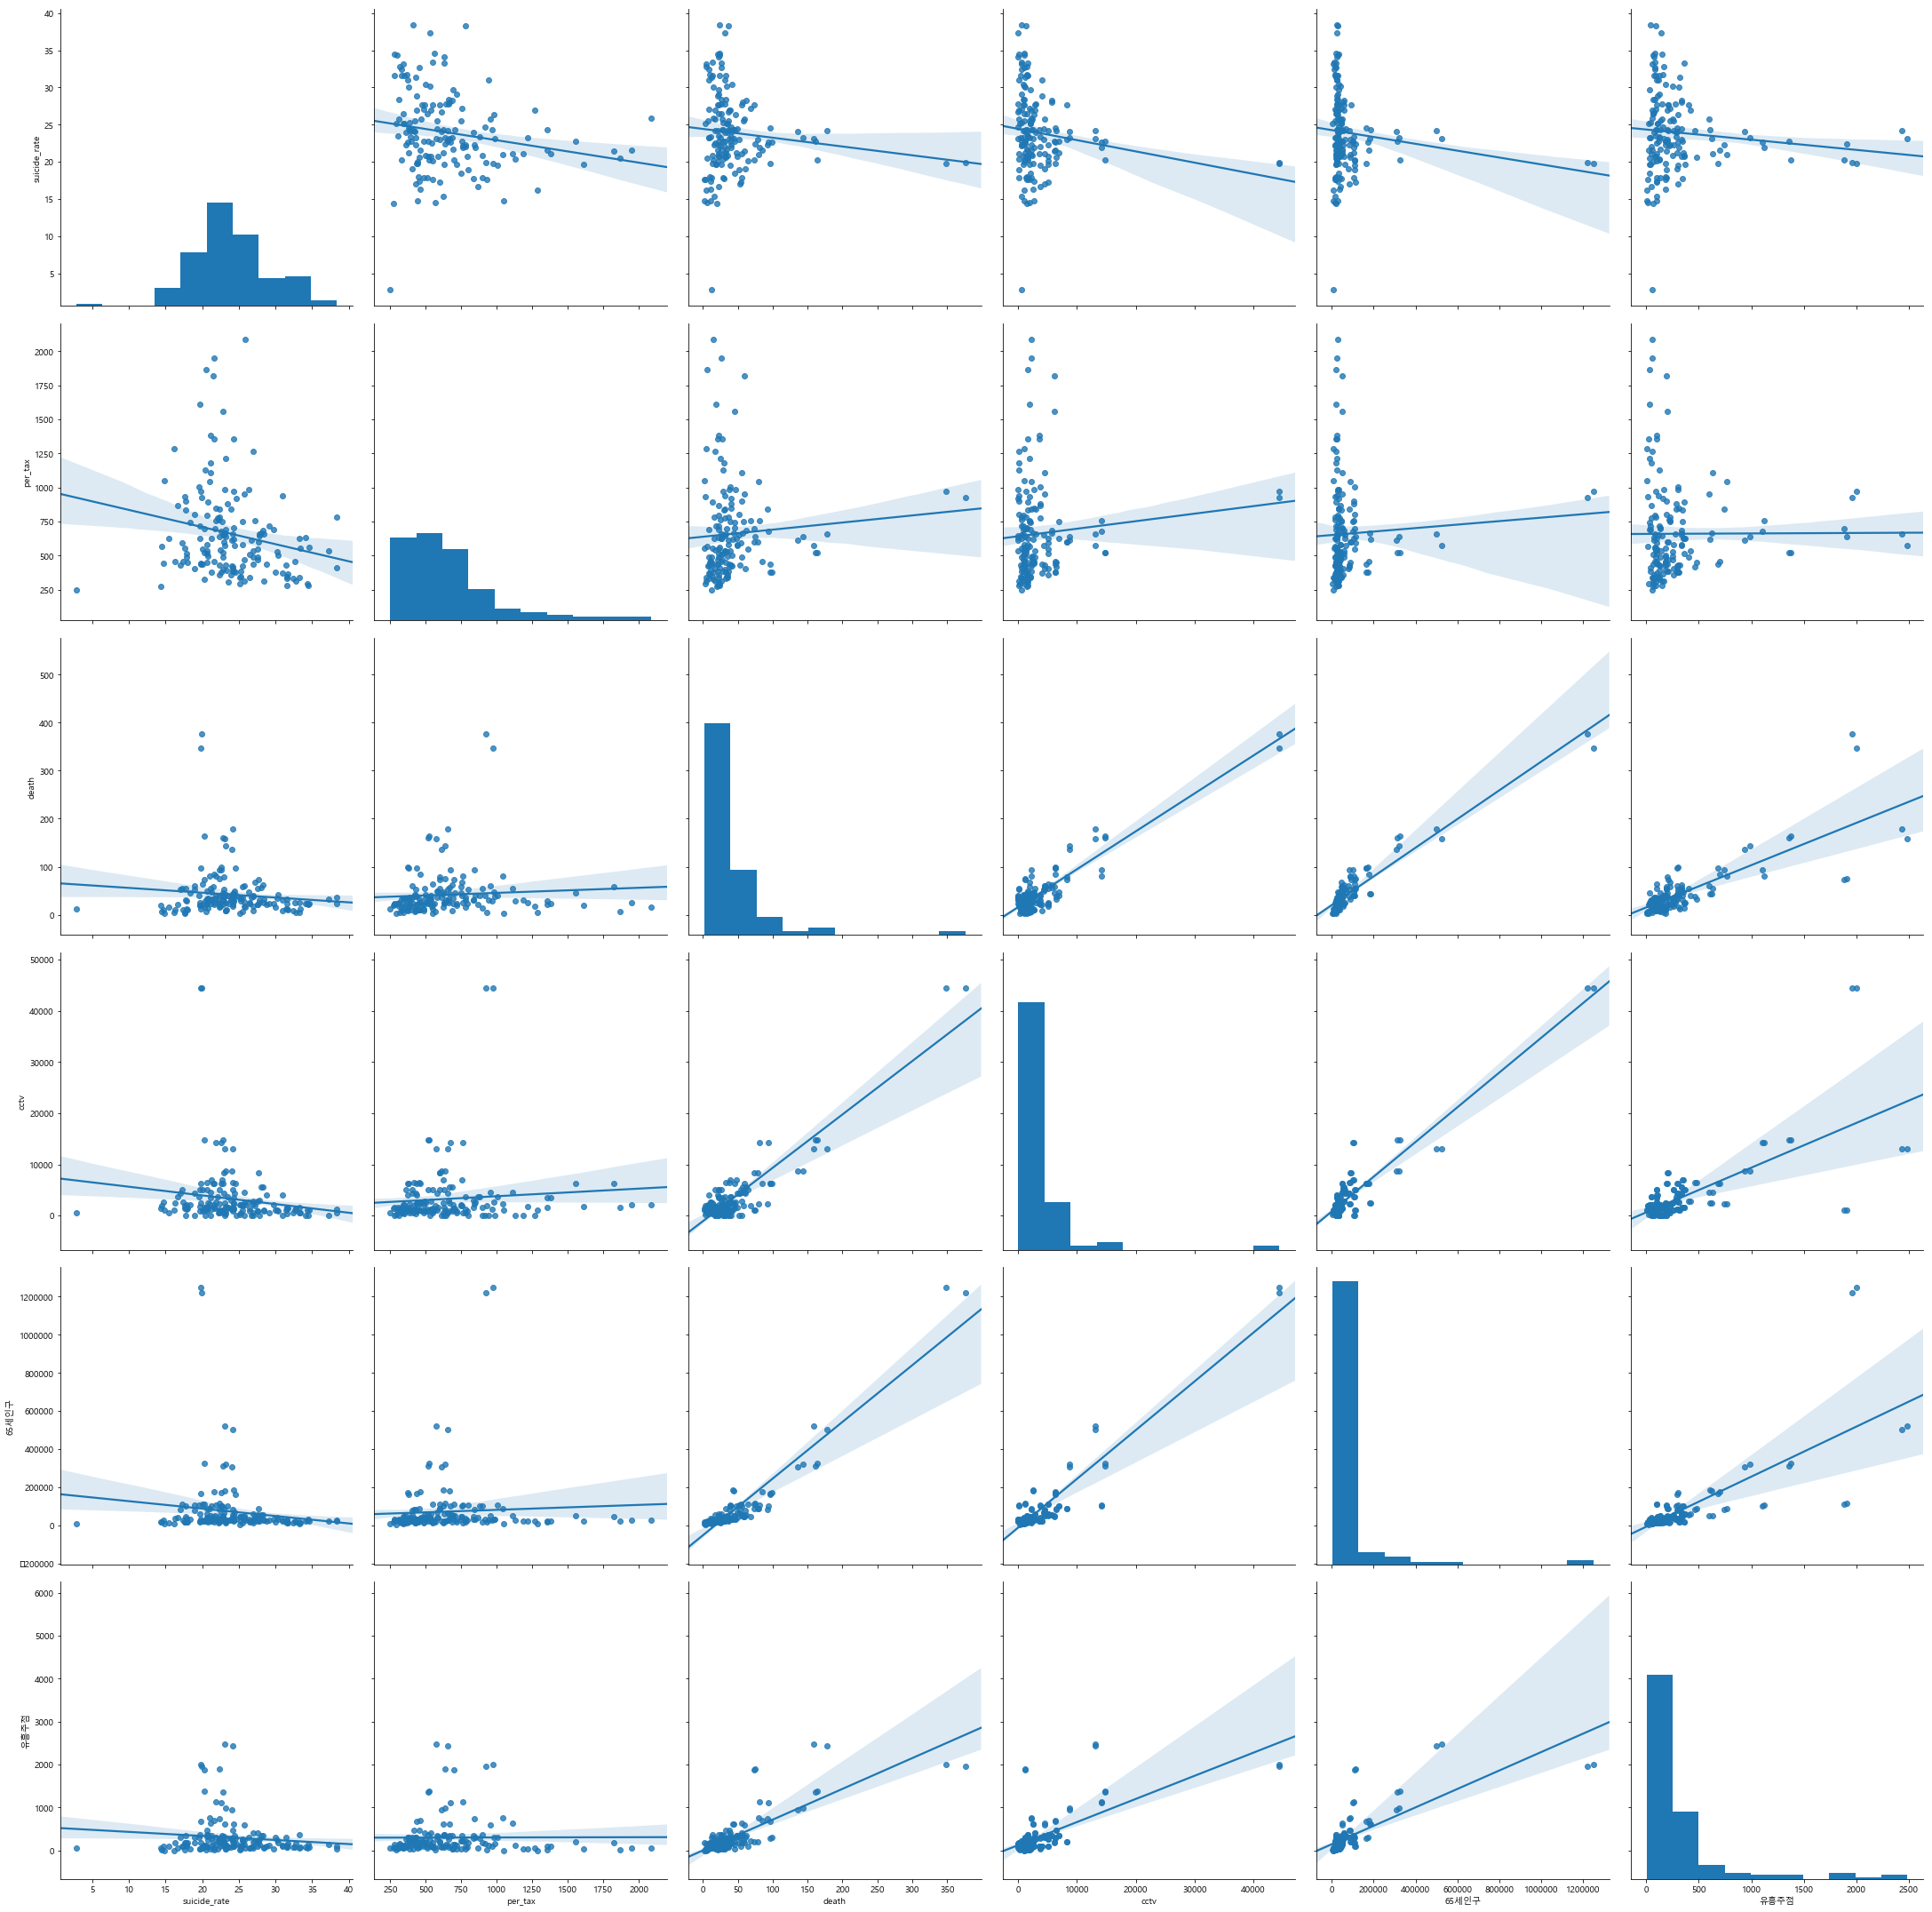

In [45]:
sns.pairplot(total_data, vars=["suicide_rate", "per_tax", "death","cctv", "65세인구", "유흥주점"], kind='reg', size=5)
plt.show()

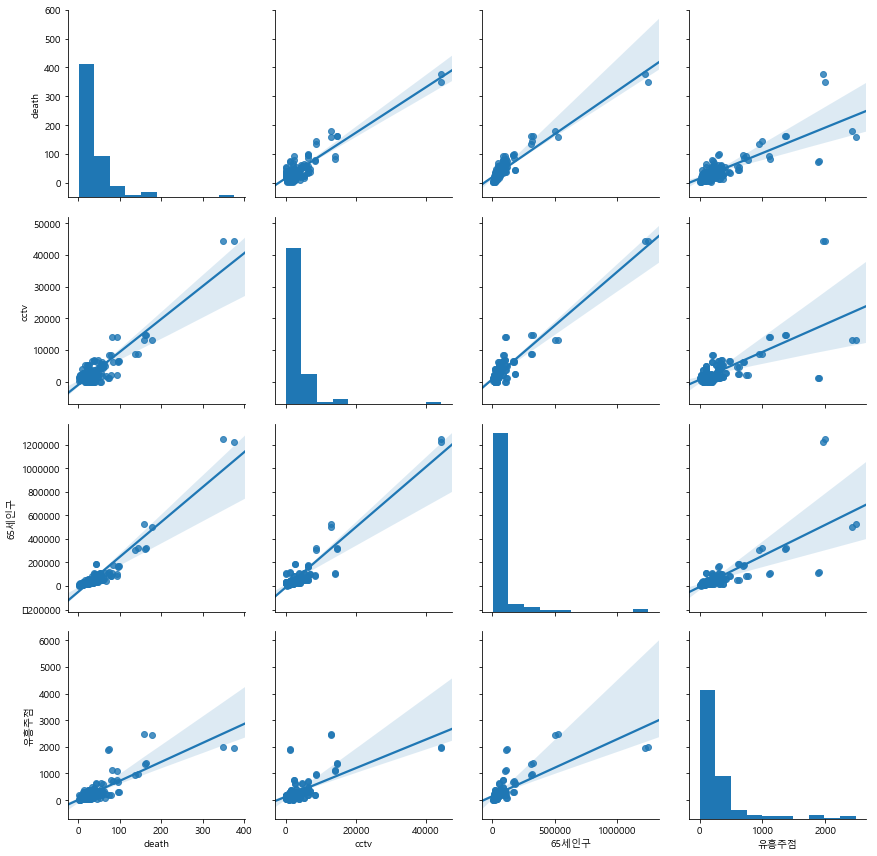

In [46]:
sns.pairplot(total_data, vars=["death","cctv", "65세인구", "유흥주점"], kind='reg', size=3)
plt.show()

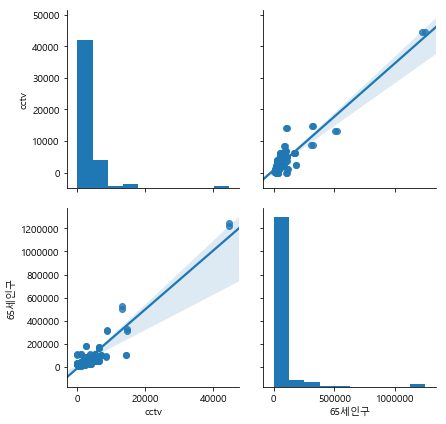

In [37]:
sns.pairplot(total_data, vars=["cctv", "65세인구"], kind='reg', size=3)
plt.show()

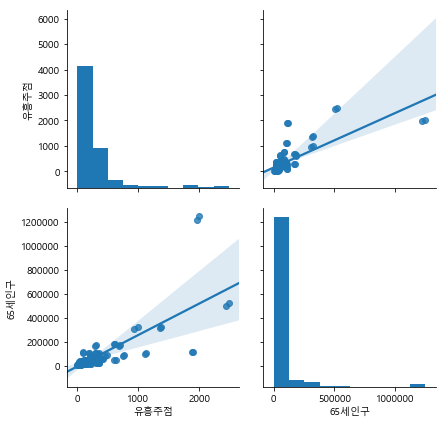

In [47]:
sns.pairplot(total_data, vars=["유흥주점", "65세인구"], kind='reg', size=3)
plt.show()

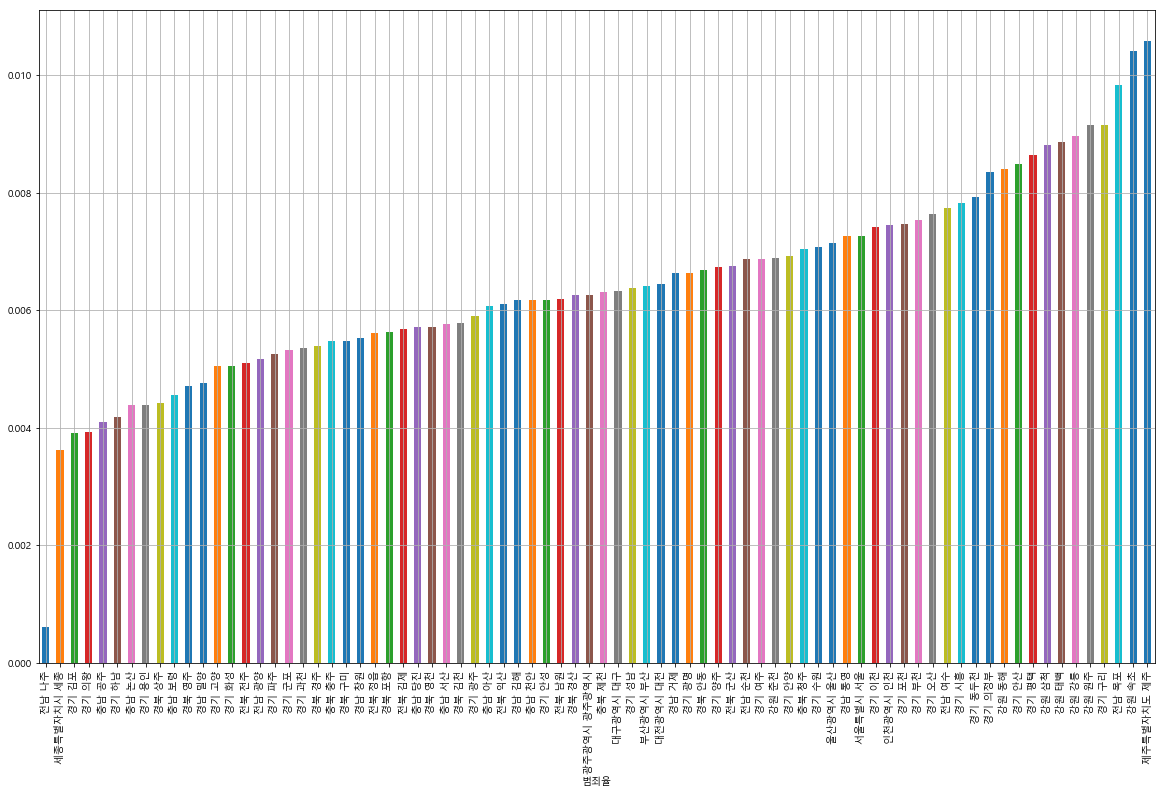

In [38]:
#Crime Rates
data_2016['crimeRate'].sort_values().plot(kind='bar', grid=True, figsize=(20,12))
plt.xlabel('범죄율')
plt.show()

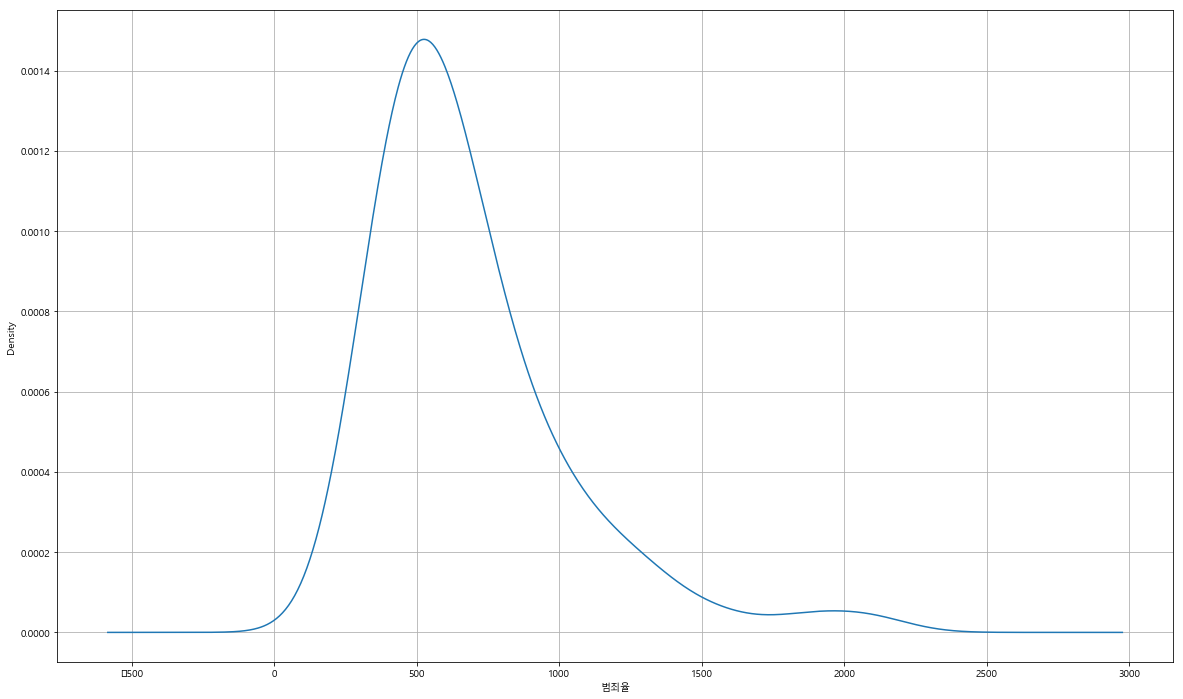

In [39]:
#Crime Rates
data_2016['per_tax'].sort_values().plot(kind='kde',grid=True, figsize=(20,12))
plt.xlabel('범죄율')
plt.show()

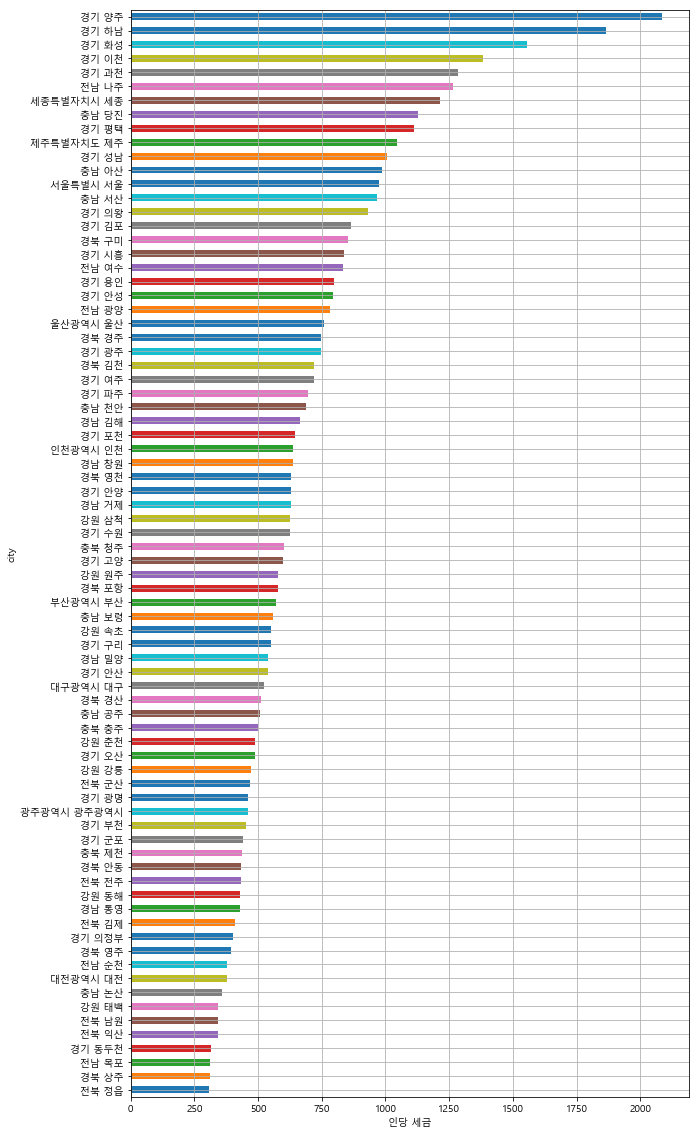

In [40]:
#per Tax
data_2016['per_tax'].sort_values().plot(kind='barh', grid=True, figsize=(10,20))
plt.xlabel('인당 세금')
plt.show()

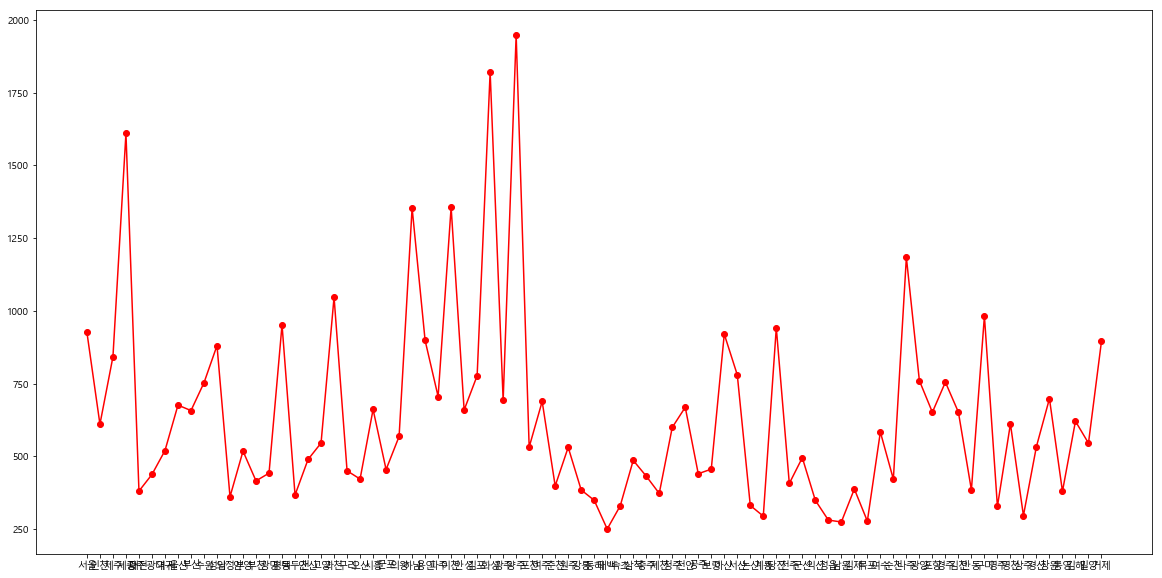

In [41]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(data_2015['district_name'], data_2015['per_tax'], '-ro')
